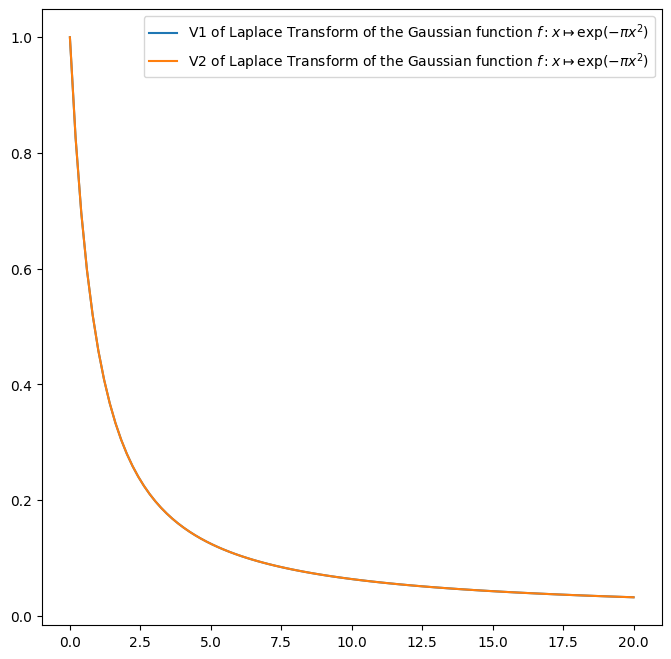

In [1]:
import numpy as np
from scipy import special
from scipy import stats
from tqdm import tqdm
import matplotlib.pyplot as plt
x = np.linspace(0, 20, 100,dtype=np.float64)
laplace_gaussian_func = lambda s: np.exp(np.pi*(s**2)/4)*special.erfc(s*np.sqrt(np.pi)/2) 
laplace_gaussian_func2 = lambda s: special.erfcx(s*np.sqrt(np.pi)/2)


plt.figure(figsize=(8,8))
plt.plot(x,laplace_gaussian_func(x))

plt.plot(x,laplace_gaussian_func2(x))
plt.legend([r'V1 of Laplace Transform of the Gaussian function $f:x\mapsto \exp(-\pi x^2 $)',
            r'V2 of Laplace Transform of the Gaussian function $f:x\mapsto \exp(-\pi x^2 $)'])


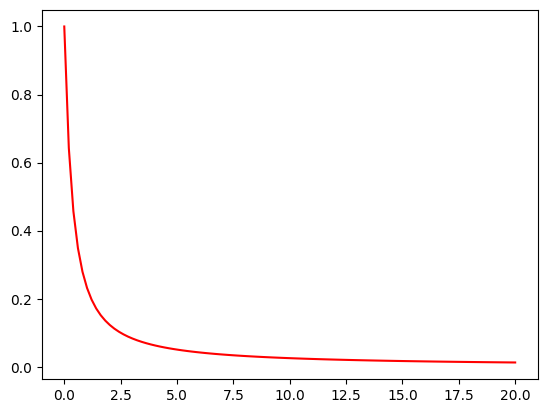

In [2]:
laplace_gaussian_distrib = lambda s: laplace_gaussian_func2(np.sqrt(2*np.pi)*s)

plt.plot(x,laplace_gaussian_distrib(x),'r')


In [3]:
rel_variance_IS_1D = lambda u: (laplace_gaussian_distrib(2*u)/(laplace_gaussian_distrib(u))**2)-1
plt.plot(x,rel_variance_IS_1D(x),'g')
plt.close()

In [4]:
proba_to_threshold = lambda p: stats.norm.isf(p)
def rel_variance_IS_1D_from_proba(p):
    return rel_variance_IS_1D(proba_to_threshold(p))



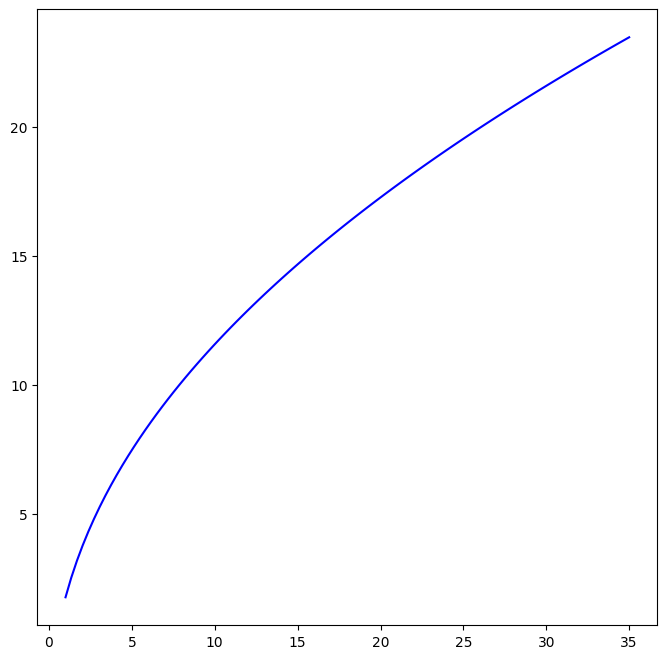

In [5]:
proba_range = np.logspace(-35,-1.,100)
plt.figure(figsize=(8,8))
proba_range = proba_range[::-1 ]
log10_proba_range = -np.log10(proba_range)
plt.plot(log10_proba_range,rel_variance_IS_1D_from_proba(proba_range),'b')



In [6]:
proba_range = np.logspace(-30,-5.,15)
log10_proba_range= -np.log10(proba_range)
thresh_range = proba_to_threshold(proba_range)
normal_dist = stats.norm(loc=0,scale=1)
print(f"probabilities: {proba_range}")
print(f"thresholds: {thresh_range}")
def IS_1D(N,thresh,batch_size):
    p_IS=0
    var_IS = 0
    bias_dist = stats.norm(loc=thresh)
    for i in range(N//batch_size):
        x = thresh+ np.random.normal(size=batch_size)
        pdf_ratio = stats.norm.pdf(x)/stats.norm(loc=thresh).pdf(x)
        p_local = ((x>thresh).astype(float) *pdf_ratio).mean()
        var_local = ((x>thresh).astype(float) *pdf_ratio**2).mean()-p_local**2
        p_IS=(i*batch_size*p_IS+p_local*batch_size)/(i*batch_size+batch_size)
        var_IS = (i*batch_size*var_IS+var_local*batch_size)/(i*batch_size+batch_size)
    if N%batch_size!=0:
        x = np.random.normal(size=N%batch_size)
        pdf_ratio = stats.norm.pdf(x)/stats.norm(loc=thresh).pdf(x)
        p_local = ((x>thresh).astype(float) *pdf_ratio).mean()
        var_local = ((x>thresh).astype(float) *pdf_ratio**2).mean()-p_local**2
        p_IS=(N//batch_size*batch_size*p_IS+p_local*(N%batch_size))/(N//batch_size*batch_size+N%batch_size)
        var_IS = (N//batch_size*batch_²size*var_IS+var_local*(N%batch_size))/(N//batch_size*batch_size+N%batch_size)
    return p_IS,var_IS

ests=[IS_1D(int(1e5),thresh,int(1e5)) for thresh in thresh_range]
var_ests = np.array([est[1] for est in ests])
proba_ests = np.array([est[0] for est in ests])
print(f"proba_ests: {proba_ests},\nrel_var_ests: {var_ests//proba_ests**2}")
# variance_ests= np.var(proba_ests,axis=1)
# variance_rel = variance_ests/proba_range**2
# plt.plot(log10_proba_range,variance_rel,'r')

SyntaxError: invalid character '²' (U+00B2) (2935657083.py, line 24)

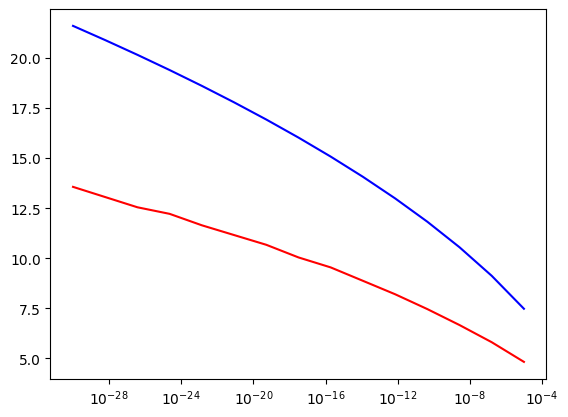

In [9]:
plt.plot(proba_range,var_ests/proba_range**2,'r',label='Empirical relative variance')
plt.plot(proba_range,rel_variance_IS_1D_from_proba(proba_range),'b',label='Theoretical relative variance')
plt.xscale('log')